In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Mini‑project: Informe de Análisis Estadístico sobre el dataset «tips» de seaborn
# 1. Carga y vista preliminar del dataset
df = sns.load_dataset('tips')
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Mini‑project: Informe de Análisis Estadístico sobre el dataset «tips» de seaborn
# 1. Carga y vista preliminar del dataset
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# 2. Formulación de hipótesis
### H₀: La propina media de fumadores y no fumadores es igual.
### H₁: La propina media difiere entre fumadores y no fumadores.

In [3]:

# 3. Elección de prueba: t-test independiente (dos muestras)
tips_smokers = df.loc[df['smoker']=='Yes', 'tip']
tips_nonsmokers = df.loc[df['smoker']=='No', 'tip']

print(tips_nonsmokers.head())
print(tips_smokers.head())

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64
56    3.00
58    1.76
60    3.21
61    2.00
62    1.98
Name: tip, dtype: float64


In [4]:
print(tips_nonsmokers.size)
print(tips_smokers.size)

151
93


In [5]:
# 4. Verificación de supuestos
#    4.1 Normalidad (Shapiro-Wilk)
sh_s = stats.shapiro(tips_smokers)
sh_ns = stats.shapiro(tips_nonsmokers)
print("Shapiro fumadores:", sh_s)
print("Shapiro no fumadores:", sh_ns)

# Formulación de hipótesis
# H₀: La muestra proviene de una normal.
# H₁: La muestra no proviene de una normal.

if sh_s.pvalue < 0.05:
    print('Para los fumadores. Se rechaza H0. La muestra no proviene de una normal.')
else:
    print('Para los fumadores. No se rechaza H0. La muestra proviene de una normal.')

if sh_ns.pvalue < 0.05:
    print('Para los no fumadores. Se rechaza H0. La muestra no proviene de una normal.')
else:
    print('Para los no fumadores. No se rechaza H0. La muestra proviene de una normal.')


Shapiro fumadores: ShapiroResult(statistic=0.8788249661085323, pvalue=3.612564299352561e-07)
Shapiro no fumadores: ShapiroResult(statistic=0.9040014583128897, pvalue=2.0587577392218136e-08)
Para los fumadores. Se rechaza H0. La muestra no proviene de una normal.
Para los no fumadores. Se rechaza H0. La muestra no proviene de una normal.


In [6]:
#    4.2 Homogeneidad de varianzas (Levene)
lev = stats.levene(tips_smokers, tips_nonsmokers)
print("Levene:", lev)

# Formulación de hipótesis
# H₀: Las muestras tienen varianzas homogéneas.
# H₁: Las muestras no tienen varianzas homogéneas.

if lev.pvalue < 0.05:
    print('Se rechaza H0. Las muestras no tienen varianzas homogéneas.')
else:
    print('No se rechaza H0. Las muestras tienen varianzas homogéneas.')


Levene: LeveneResult(statistic=0.02051159105706963, pvalue=0.8862366542563406)
No se rechaza H0. Las muestras tienen varianzas homogéneas.


In [7]:
# 5. Ejecución de puebea Mann-Whitney

# Formulación de hipótesis
# H₀: Las medias son iguales.
# H₁: Las medias son diferentes.



if sh_s.pvalue > 0.05 and sh_ns.pvalue > 0.05 and lev.pvalue > 0.05:
    test = stats.ttest_ind(tips_smokers, tips_nonsmokers)
    print("t-test:", test)
else:
    test = stats.mannwhitneyu(tips_smokers, tips_nonsmokers)
    print("Mann-Whitney U:", test)


if test.pvalue < 0.05:
    print('Se rechaza H0. Las medias son diferentes.')
else:
    print('No se rechaza H0. Las medias son iguales.')


Mann-Whitney U: MannwhitneyuResult(statistic=7163.0, pvalue=0.7919240198382322)
No se rechaza H0. Las medias son iguales.


In [8]:
# 6. Ajuste de modelo lineal para propina ~ total_bill + smoker
model = smf.ols('tip ~ total_bill + C(smoker)', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           6.57e-33
Time:                        18:51:09   Log-Likelihood:                -349.93
No. Observations:                 244   AIC:                             705.9
Df Residuals:                     241   BIC:                             716.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8143      0.186     

In [9]:
# 7. Diagnóstico rápido del modelo
print("R²:", model.rsquared)
print("Residuos (primeros 5):\n", model.resid.head())


R²: 0.4593402086520325
Residuos (primeros 5):
 0   -1.749447
1   -0.396393
2    0.315549
3   -0.156730
4    0.047063
dtype: float64


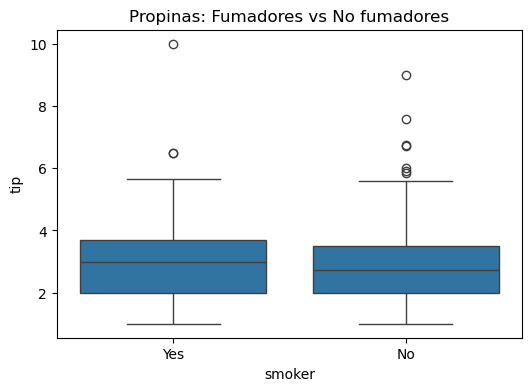

In [10]:
# 8. Visualización de resultados
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title("Propinas: Fumadores vs No fumadores")
plt.show()